In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("/content/credit-card-default.csv")
df


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [4]:
# import train and test
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = df.drop(['defaulted'], axis=1)

# Putting response variable to y
y = df['defaulted']



# Splitting the data into train and test with test size as 30% and random state as 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
# import StandardScaler, DecisionTreeClassifier and make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [7]:
## Pipeline Estimator with StandardScaler and DecisionTreeClassifier with random_state as 1
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=1))


# fit model on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=1))])

In [9]:
# Model scores on test and training data
print('Model test Score: %.3f, Model training Score: %.3f' % (pipeline.score(X_test, y_test), pipeline.score(X_train, y_train)))

Model test Score: 0.728, Model training Score: 1.000


In [13]:
# import BaggingClassifier
from sklearn.ensemble import BaggingClassifier


# Instantiate the bagging classifier with estimator as pipeline and random_state=1
bgclassifier = BaggingClassifier(estimator=pipeline, random_state=1)


# fit the model on training data
bgclassifier.fit(X_train, y_train)


## Model scores on test and training data
print('Model test Score: %.3f, Model training Score: %.3f' % (bgclassifier.score(X_test, y_test), bgclassifier.score(X_train, y_train)))

Model test Score: 0.810, Model training Score: 0.979


Model trainnig score .97, test score .8 , so the model is overfitting.
So, we need hyperparameter tunning using GridsearchCV


In [16]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

'''A dictionary with base_estimator__max_depth from 1 to 20 with step size as 5
A max_samples with [0.05, 0.1, 0.2, 0.5] and max_features form 1 to 20 with step size as 5'''


params ={
   "max_samples": [0.05, 0.1, 0.2, 0.5],
   "estimator__max_depth" : list(range(1, 21, 5)),
   "max_features" : list(range(1, 21, 5))

}





# Instantiate gridsearch with BaggingClassifier with base estimator DecisionTreeClassifier and random_state=1
gs = GridSearchCV(BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1), param_grid=params, cv=5,n_jobs=-1)


# fit the model on training data
gs.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         random_state=1),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 6, 11, 16],
                         'max_features': [1, 6, 11, 16],
                         'max_samples': [0.05, 0.1, 0.2, 0.5]})

In [17]:
# print best paramaters selected by gridsearch
gs.best_params_

#print mean accuracy score on final tuned  BaggingClassifier
print('Mean Accuracy Score: %.3f' % gs.best_score_)

Mean Accuracy Score: 0.810


So, the overfitting is reduced.

In [19]:
# Instantiate the bagging classifier with optimized parameter by grid search and random_state=1
bgclassifier = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=1, max_features=1, max_samples=0.5)


# fit the model on training data
bgclassifier.fit(X_train, y_train)


## Model scores on test and training data
print('Model test Score: %.3f, Model training Score: %.3f' % (bgclassifier.score(X_test, y_test), bgclassifier.score(X_train, y_train)))

Model test Score: 0.784, Model training Score: 0.776


In [20]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters, but random_state as 1
rfc = RandomForestClassifier(random_state=1)

# fit model on training data
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [23]:
# Making predictions
predictions = rfc.predict(X_test)

# Importing classification report
from sklearn.metrics import classification_report

# Printing classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7058
           1       0.66      0.37      0.47      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [25]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

#Printing accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

[[6683  375]
 [1224  718]]
0.8223333333333334


  Tunning Max_depth

In [27]:
# import Kfold
from sklearn.model_selection import KFold


# specify number of folds for k-fold CV which is 5
n_folds = 5

# parameters to build the model on here max_depth with range(2, 20, 5)
parameters = {'max_depth': list(range(2, 20, 5))}



# instantiate the model Random Forest with random_state=1
rf = RandomForestClassifier(random_state=1)



# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score=True
rf = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', n_jobs=-1, return_train_score=True)

# fit tree on training data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [2, 7, 12, 17]}, return_train_score=True,
             scoring='accuracy')

In [29]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)
scores

# convert scores into dataframe and print head
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.633430,0.287123,0.054007,0.013940,2,{'max_depth': 2},0.803095,0.803095,0.800476,0.796905,...,0.800905,0.002271,4,0.801190,0.799464,0.801667,0.803333,0.801786,0.801488,0.001242
1,7.704063,1.003287,0.091995,0.037857,7,{'max_depth': 7},0.815238,0.819762,0.818095,0.817857,...,0.817667,0.001455,1,0.831012,0.831071,0.831548,0.833333,0.834107,0.832214,0.001267
2,8.675316,1.346518,0.086577,0.016493,12,{'max_depth': 12},0.813095,0.819286,0.820476,0.814286,...,0.816905,0.002829,2,0.883929,0.886012,0.884345,0.887560,0.885298,0.885429,0.001290
3,10.364895,0.802805,0.121798,0.039004,17,{'max_depth': 17},0.812143,0.815952,0.820000,0.808571,...,0.815190,0.004326,3,0.926845,0.930536,0.931548,0.929524,0.927857,0.929262,0.001716


We can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

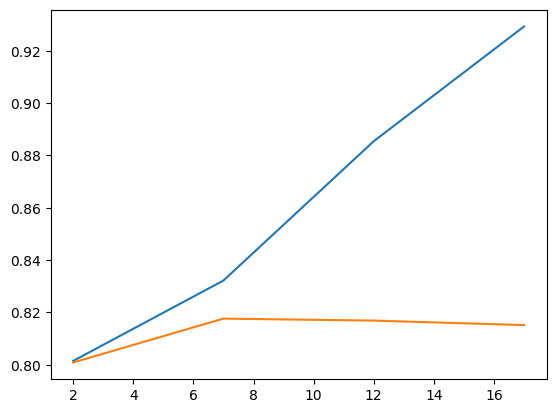

In [30]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label='test accuracy')



Tunning n_estimator

In [31]:

# parameters to build the model on (here n_estimators with range(100, 1500, 400))
parameters = {'n_estimators': list(range(100, 1500, 400))}


# instantiate the model (note we are specifying a max_depth as 4) and random_state as 1
rf = RandomForestClassifier(max_depth=4, random_state=1)


# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
rf = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', n_jobs=-1, return_train_score=True)



# fit tree on training data
rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             n_jobs=-1, param_grid={'n_estimators': [100, 500, 900, 1300]},
             return_train_score=True, scoring='accuracy')

In [32]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)

# convert scores into dataframe and print head
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.020579,1.475677,0.040285,0.002577,100,{'n_estimators': 100},0.812143,0.813333,0.812619,0.805000,...,0.810619,0.003021,1,0.811131,0.809643,0.812976,0.813214,0.813631,0.812119,0.001505
1,15.186930,0.088458,0.176590,0.005999,500,{'n_estimators': 500},0.812619,0.813571,0.810952,0.805476,...,0.810190,0.002952,2,0.811488,0.810417,0.812024,0.812560,0.812857,0.811869,0.000864
2,29.623725,1.161715,0.419420,0.123300,900,{'n_estimators': 900},0.811667,0.813810,0.811429,0.805238,...,0.810048,0.003021,3,0.811190,0.810536,0.811845,0.812798,0.812679,0.811810,0.000865
3,39.058411,3.917408,0.448639,0.011271,1300,{'n_estimators': 1300},0.811667,0.813571,0.811429,0.805000,...,0.809857,0.003103,4,0.811190,0.810238,0.811905,0.812798,0.812738,0.811774,0.000969


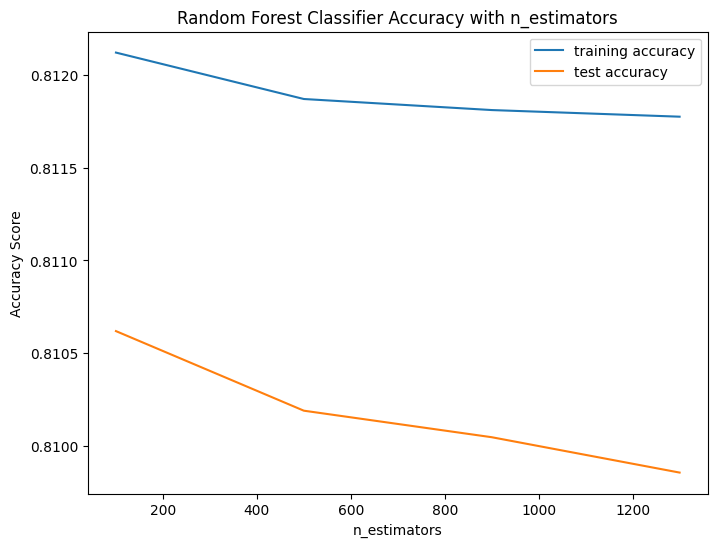

In [35]:
# plotting accuracies with n_estimators
plt.figure(figsize=(8, 6))
plt.plot(scores['param_n_estimators'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_n_estimators'], scores['mean_test_score'], label='test accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Classifier Accuracy with n_estimators')
plt.legend()
plt.show()

Tunning Max_feature

In [36]:

# parameters to build the model on max_features with [4, 8, 14, 20, 24]
parameters = {'max_features': [4, 8, 14, 20, 24]}




# instantiate the model (note we are specifying a max_depth as 4) and random_state as 1
rf = RandomForestClassifier(max_depth=4, random_state=1)



# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
rf = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', n_jobs=-1, return_train_score=True)



# fit tree on training data
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=4, random_state=1),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [38]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)
# convert scores into dataframe and print head
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.510895,0.962170,0.066733,0.020833,4,{'max_features': 4},0.812143,0.813333,0.812619,0.805000,...,0.810619,0.003021,5,0.811131,0.809643,0.812976,0.813214,0.813631,0.812119,0.001505
1,8.270016,1.044135,0.083687,0.036477,8,{'max_features': 8},0.817619,0.820952,0.820000,0.817381,...,0.818905,0.001377,1,0.821369,0.820179,0.821726,0.821369,0.821131,0.821155,0.000524
2,15.711143,1.213324,0.084036,0.022959,14,{'max_features': 14},0.817619,0.821429,0.817857,0.816429,...,0.818571,0.001737,4,0.822321,0.820952,0.821726,0.822321,0.821310,0.821726,0.000544
3,14.995680,2.569820,0.037476,0.001708,20,{'max_features': 20},0.817619,0.821905,0.819762,0.815476,...,0.818619,0.002148,3,0.822262,0.820774,0.821369,0.822798,0.821964,0.821833,0.000703
4,14.468034,0.934021,0.035063,0.005132,24,{'max_features': 24},0.818095,0.821667,0.819762,0.815000,...,0.818667,0.002190,2,0.822976,0.821250,0.821726,0.823214,0.822976,0.822429,0.000787


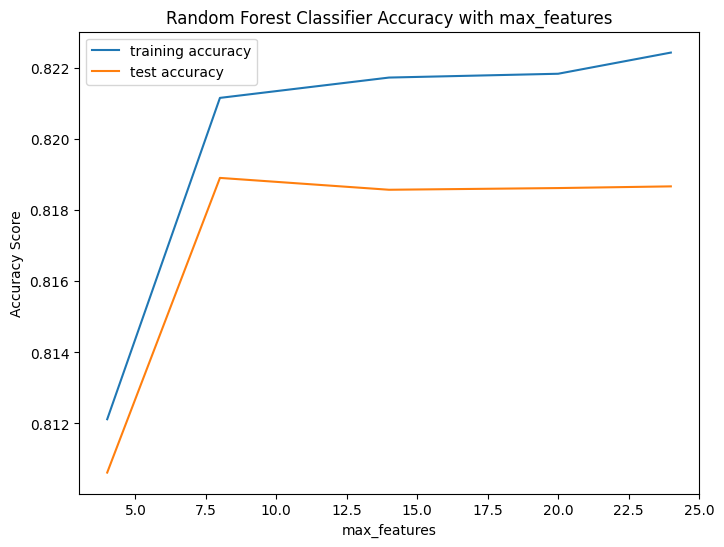

In [39]:
# plotting accuracies with max_features
plt.figure(figsize=(8, 6))
plt.plot(scores['param_max_features'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_max_features'], scores['mean_test_score'], label='test accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Classifier Accuracy with max_features')
plt.legend()
plt.show()

Tunning min_samples_leaf

In [40]:
# parameters to build the model on min_samples_leaf of range(100, 400, 50)
parameters = {'min_samples_leaf': list(range(100, 400, 50))}

# instantiate the model (not specifying any max_depth) and random_state as 1
rf = RandomForestClassifier(random_state=1)


# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
rf = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', n_jobs=-1, return_train_score=True)

# fit tree on training data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'min_samples_leaf': [100, 150, 200, 250, 300, 350]},
             return_train_score=True, scoring='accuracy')

In [41]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)
# convert scores into df and print
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.555506,0.757875,0.121194,0.064958,100,{'min_samples_leaf': 100},0.815238,0.817857,0.815238,0.811667,...,0.814286,0.002433,1,0.817679,0.816012,0.816964,0.817619,0.818333,0.817321,0.000785
1,6.064443,1.401361,0.061323,0.009306,150,{'min_samples_leaf': 150},0.812381,0.814524,0.812381,0.808095,...,0.811095,0.002571,2,0.810952,0.812262,0.812500,0.814702,0.812560,0.812595,0.001205
2,4.529025,0.464561,0.069386,0.022374,200,{'min_samples_leaf': 200},0.810952,0.811429,0.811190,0.805476,...,0.809429,0.002316,3,0.808810,0.809821,0.809583,0.811131,0.811845,0.810238,0.001098
3,4.446518,0.385989,0.074411,0.027639,250,{'min_samples_leaf': 250},0.810952,0.811429,0.809762,0.803571,...,0.808524,0.002933,4,0.808631,0.808155,0.810298,0.810298,0.810714,0.809619,0.001024
4,3.939837,0.208008,0.059343,0.012270,300,{'min_samples_leaf': 300},0.809286,0.809524,0.808810,0.804762,...,0.807476,0.002133,5,0.807798,0.806429,0.808750,0.808988,0.808869,0.808167,0.000966


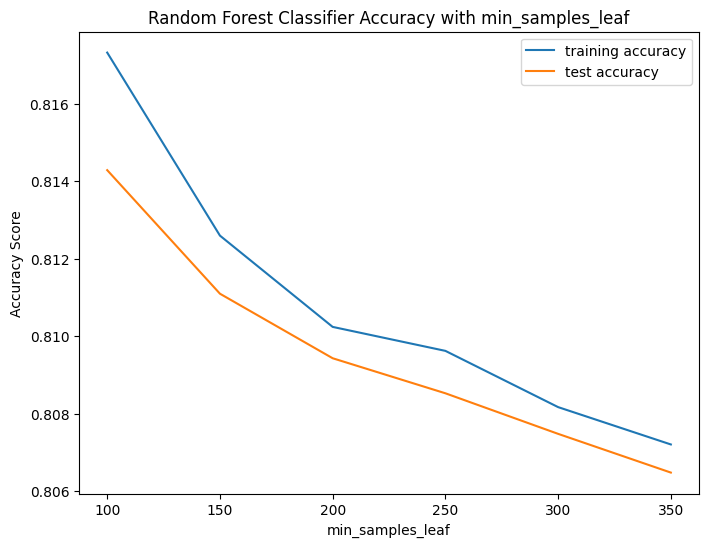

In [42]:
# plotting accuracies with min_samples_leaf
plt.figure(figsize=(8, 6))
plt.plot(scores['param_min_samples_leaf'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label='test accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Classifier Accuracy with min_samples_leaf')
plt.legend()
plt.show()

Tunning min_samples_split

In [43]:

# parameters to build the model on (min_samples_split with range(200, 500, 50))
parameters = {'min_samples_split': list(range(200, 500, 50))}


# instantiate the model with random_state as 1
rf = RandomForestClassifier(random_state=1)

# Instantiate GridSearchCVwith rf, parameter, cv and scoring as accuracy and return_train_score as True
rf = GridSearchCV(estimator=rf, param_grid=parameters, cv=n_folds, scoring='accuracy', n_jobs=-1, return_train_score=True)


#fitting model on training data
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'min_samples_split': [200, 250, 300, 350, 400, 450]},
             return_train_score=True, scoring='accuracy')

In [44]:
# scores of GridSearch CV
scores = pd.DataFrame(rf.cv_results_)
# convert scores into df and print head
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.398609,1.882218,0.120263,0.066741,200,{'min_samples_split': 200},0.818571,0.820714,0.820714,0.817381,...,0.819190,0.001318,1,0.824286,0.823333,0.823274,0.824048,0.823988,0.823786,0.000407
1,13.165446,0.499290,0.147908,0.056424,250,{'min_samples_split': 250},0.818810,0.821667,0.820000,0.816905,...,0.819143,0.001605,2,0.822321,0.821607,0.822976,0.822976,0.823274,0.822631,0.000599
2,9.514737,1.964467,0.066024,0.001980,300,{'min_samples_split': 300},0.817381,0.821667,0.822143,0.816667,...,0.818714,0.002662,3,0.821667,0.821131,0.821726,0.821964,0.822679,0.821833,0.000503
3,7.678162,0.725466,0.075130,0.021830,350,{'min_samples_split': 350},0.817857,0.821429,0.820714,0.815714,...,0.818190,0.002522,6,0.820119,0.820833,0.820655,0.822440,0.821726,0.821155,0.000825
4,7.186104,0.540705,0.077524,0.024030,400,{'min_samples_split': 400},0.816905,0.820476,0.820952,0.815952,...,0.818381,0.001983,4,0.819762,0.819881,0.820298,0.820476,0.821071,0.820298,0.000467


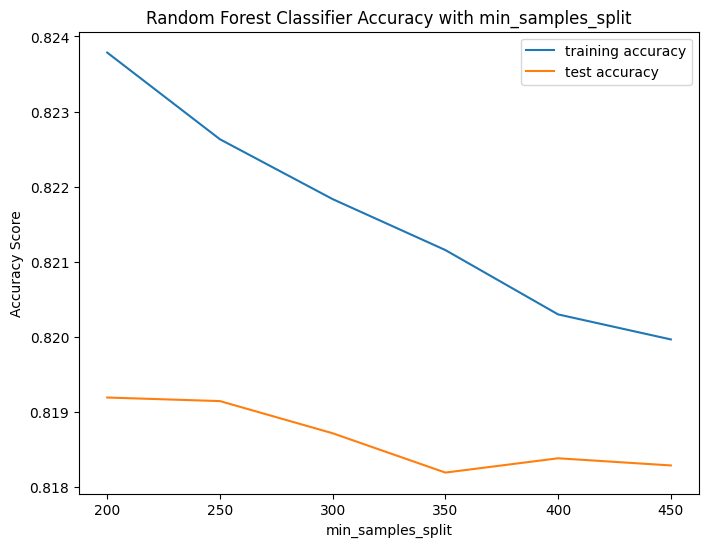

In [45]:
# plotting accuracies with min_samples_split
plt.figure(figsize=(8, 6))
plt.plot(scores['param_min_samples_split'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_min_samples_split'], scores['mean_test_score'], label='test accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Classifier Accuracy with min_samples_split')
plt.legend()
plt.show()

In [47]:
# import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'max_features': [2,6,8],
    'min_samples_leaf': range(200,250,300),
    "min_samples_split": range(350,400,450)
}

# Create a based model (i.e RF) with random_state as 1

rf = RandomForestClassifier(random_state=1)

# Instantiate the radom search model with estimator, param_grid, and random_state as 1
rs = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, random_state=1)

In [48]:
# Fit the grid search to the data
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [2, 6, 8],
                                        'min_samples_leaf': range(200, 250, 300),
                                        'min_samples_split': range(350, 400, 450)},
                   random_state=1)

In [49]:
# printing the optimal accuracy score and hyperparameters
print('The accuracy score for Random Forest Classifier after hyperparameter tuning is:', rs.best_score_)

The accuracy score for Random Forest Classifier after hyperparameter tuning is: 0.8178571428571428


In [50]:
# Instantiate RF model with the best hyperparameters along with random_state as 1
rfc = RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=200, min_samples_split=350, random_state=1)



In [51]:
# fit rfc on training data
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_leaf=200,
                       min_samples_split=350, random_state=1)

In [52]:
# predict
predictions = rfc.predict(X_test)

In [53]:
# evaluation metrics using classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.33      0.45      1942

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.67      9000
weighted avg       0.81      0.82      0.80      9000



In [54]:
#print confusion_matrix and
print(confusion_matrix(y_test, predictions))

#print accuracy
print(accuracy_score(y_test, predictions))

[[6770  288]
 [1294  648]]
0.8242222222222222


In [55]:
# import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier


#Instantiate ExtraTreesClassifier with default parameters except random_state as 1
etc = ExtraTreesClassifier(random_state=1)


#fitting model on training data
etc.fit(X_train, y_train)


ExtraTreesClassifier(random_state=1)

In [ ]:
# Making predictions
predictions = etc.predict(X_test)

In [56]:
# Let's check the report of our default model
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.33      0.45      1942

    accuracy                           0.82      9000
   macro avg       0.77      0.65      0.67      9000
weighted avg       0.81      0.82      0.80      9000



In [57]:
# Printing confusion matrix
print(confusion_matrix(y_test, predictions))

#Printing accuracy
print(accuracy_score(y_test, predictions))

[[6770  288]
 [1294  648]]
0.8242222222222222


In [58]:
# Create the parameter grid similar to random forest

param_grid = {
    'max_depth': [4,8,10],
    'max_features': [2,6,8],
    'min_samples_leaf': range(200,250,300),
    "min_samples_split": range(350,400,450)
}

# Instantiate RandomizedSearchCV with et , param_grid and random state=1

rs = RandomizedSearchCV(estimator=etc, param_distributions=param_grid, random_state=1)

# Fit the random search to the training data
rs.fit(X_train, y_train)

# printing the optimal accuracy score and hyperparameters
print('The accuracy score for Extra Trees Classifier after hyperparameter tuning is:', rs.best_score_)

The accuracy score for Extra Trees Classifier after hyperparameter tuning is: 0.8049523809523811


In [59]:
#Instantiate ExtraTreesClassifier with default parameters
et = ExtraTreesClassifier(random_state=1)

#fitting model on training data
et.fit(X_train, y_train)

ExtraTreesClassifier(random_state=1)

In [62]:
# Making predictions
predictions = et.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
#printing accuracy_score
print(accuracy_score(y_test, predictions))

0.8136666666666666
